In [3]:
#check for data file
import os

In [2]:
print(os.listdir())

['.ipynb_checkpoints', '911.csv', 'projectOne.ipynb']


In [4]:
# import all major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# usage of inline plotting
%matplotlib inline

In [6]:
#load data from CSV file
dataFrame = pd.read_csv('./911.csv')

In [7]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [8]:
#check head for our dataframe
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
#top5 zipcodes
dataFrame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [14]:
#top6 twp reaching to 911
dataFrame['twp'].value_counts().head(6)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
POTTSTOWN       12039
Name: twp, dtype: int64

In [15]:
#unique reason to call 911
dataFrame['title'].nunique()

131

In [22]:
# top5 specific reasons to call 911
# assignment was there!
dataFrame['SpecificReason'] = dataFrame['title'].apply(lambda title: title.split(':')[0])

In [23]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [25]:
dataFrame['SpecificReason'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: SpecificReason, dtype: int64

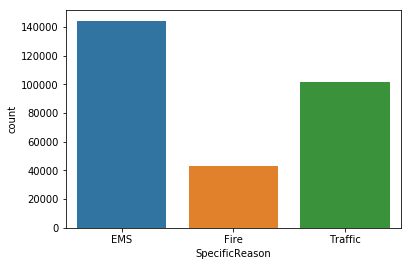

In [26]:
#plot a countplot for SpecificReason
sns.countplot(x='SpecificReason', data=dataFrame)

In [27]:
#convert timeStamp from object to actual time stamp
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [29]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 10 columns):
lat               289240 non-null float64
lng               289240 non-null float64
desc              289240 non-null object
zip               253942 non-null float64
title             289240 non-null object
timeStamp         289240 non-null datetime64[ns]
twp               289137 non-null object
addr              289240 non-null object
e                 289240 non-null int64
SpecificReason    289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 22.1+ MB


In [30]:
type(dataFrame['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [99]:
#create 3 columns for Hour, Months and day of week
dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time: time.hour)
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time: time.dayofweek)


In [102]:
dataFrame['Hour'].nunique()

24

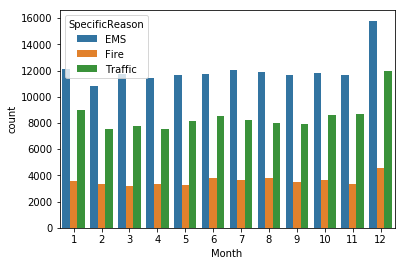

In [104]:
#plot a graph for Month
sns.countplot(x='Month', data=dataFrame, hue='SpecificReason')

In [108]:
#use group_by 
byMonth = dataFrame.groupby('Day').count()

In [109]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,SpecificReason,Hour,Month,Day of week
Day,,,,,,,,,,,,,
0,42092,42092,42092,37030,42092,42092,42081,42092,42092,42092,42092,42092,42092
1,43744,43744,43744,38385,43744,43744,43731,43744,43744,43744,43744,43744,43744
2,43442,43442,43442,38327,43442,43442,43422,43442,43442,43442,43442,43442,43442
3,42784,42784,42784,37616,42784,42784,42770,42784,42784,42784,42784,42784,42784
4,44468,44468,44468,38923,44468,44468,44450,44468,44468,44468,44468,44468,44468


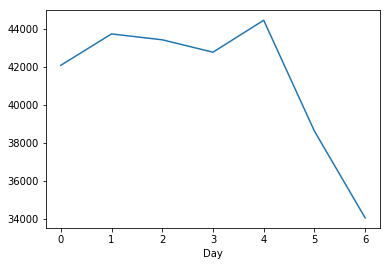

In [110]:
byMonth['twp'].plot()